<h1>An Analysis of the 2013 and 2014 Seattle Seahawks</h1>
<h2>Introduction</h2>
<p>The Seattle Seahawks won the 2014 superbowl, they beat the Broncos by a hefty 43 to 8. The Seahawks had 13 wins, 3 losses and 0 ties in the 2013 season. Being first in defense and a reasonable 8th in points scored, they were a formidable team. The next year, the Seahawks again made it to the superbowl. However, they lost to the New England Patriots 24 to 28. In the last quarter, there had been some questionable play calling the last time the Seahawks had possession of the ball. One yard from the touchdown line and on second down, Russel Wilson attempted to pass the ball to Ricardo Lockette instead of handing it to "beast mode" Marshawn Lynch, who at the time was one of the best running backs in the league. The pass was intercepted by Malcolm Butler, ensuring victory for the Patriots.</p>

<p>In this report, I want to explore the historic context in which this play was called by comparing the 2013 and 2014 super bowls play-by-play.</p>

<h3>Data Wrangling</h3>
<p>My first step will be to import all of the data and define all of the functions I will need to parse game and team data as below.</p>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display as dsp
%matplotlib inline

#Data from https://www.pro-football-reference.com/

#Parsing functions
def touchdown_log_parse(filepath, printme = False):
    df = pd.read_csv(filepath)
    df.drop(['Rk'], axis = 1, inplace = True)
    df.rename(index = str, columns = {'Unnamed: 2':'Loc'}, inplace = True)
    df['Loc'].replace(['@', np.nan],['away','home'], inplace = True)
    
    if printme == True:
        dsp(df.head())
    
    return df

def game_pbp_parse(filepath, printme = False):
    df = pd.read_csv(filepath)
    if printme == True:
        dsp(df.head())
    
    return df

def shift_yds(yds, team, focus_team):
    results = []
    i = 0
    for yd in yds:
        try:
            if team[i] == focus_team:
                results.append((float(yd) - 50))
            else:
                results.append(50 - float(yd))
        except:
            print('This entry caused problems: Index: {} Team: {} Yards: {}'.format(i, team[i], yds[i]))
        i += 1
    return results

def field_ps_parse(df, focus_team):
    #50 Yd line doesn't list team
    df['Location'].replace(['50'], ['MID 50'], inplace = True)
    fld_pos = df.dropna(subset = ['Location']).reset_index(drop = True)['Location']
    #fld_pos.str.split() Figrue out why this line doesn't work.
    
    #Break into appropriate arrays:
    fld = []
    for i in range(len(fld_pos)):
        fld.append(fld_pos[i].split())
        team,yds = zip(*fld)
    
    #dsp(fld_pos)
    #print('Field pos: \n{}'.format(fld))
    #print('Team Array: \n{}'.format(team))
    #print('Yds Array: \n{}'.format(yds))
    
    if focus_team in np.unique(team):
        yds = shift_yds(yds, team, focus_team)
    else:
        print('Specified Team Not Found')
        yds = shift_yds(yds, team, team[0])    
    return yds
    

#IMPORTING FILES

#2013 touchdown log
#print('2013 Seahawks Touchdown Log')
td2013 = touchdown_log_parse('data/2013-td-log.csv')

#2013 opponent touchdown log
#print('2013 Seahawks Opponent Touchdown Log')
td_op_2013 = touchdown_log_parse('data/2013-opp-td-log.csv')

#2014 touchdown log
#print('2014 Seahawks Touchdown Log')
td2014 = touchdown_log_parse('data/2014-td-log.csv')

#2014 opponent touchdown log
#print('2014 Seahawks Opponent Touchdown Log')
td_op_2014 = touchdown_log_parse('data/2014-opp-td-log.csv')

#2014 Superbowl Play by Play
#print('2014 Superbowl Play by Play')
sb2014 = game_pbp_parse('data/2014-sb-pbp.csv', False)

#2015 Superbowl Play by Play
#print('2015 Superbowl Play by Play')
sb2015 = game_pbp_parse('data/2015-sb-pbp.csv', False)

<h3>Dive into the Depths</h3>
<p>I have written a function that parses the play by play game files and maps the position of the beginning of every play to cartesian coordinates, where negative positions represent the positions in the highlighted team's territory, and positive numbers represent positions in the opponent's territory. We can then chart the position and play index to get a visual play-by-play representation of the game.</p>

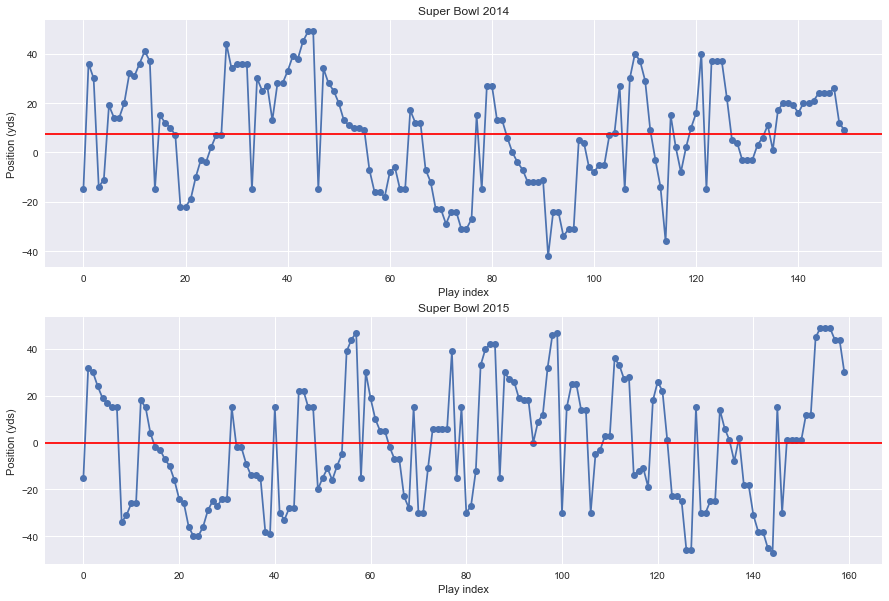

2014 Superbowl mean position: 7.32 yds
2015 Superbowl mean position: -0.28125 yds


In [3]:
yds2014sb = field_ps_parse(sb2014, 'SEA')
yds2015sb = field_ps_parse(sb2015, 'SEA')

plt.figure(figsize = (15, 10))

plt.subplot(2,1,1)
plt.plot(yds2014sb, 'o-')
plt.axhline(np.mean(yds2014sb), color = 'red')
plt.title('Super Bowl 2014')
plt.xlabel('Play index')
plt.ylabel('Position (yds)')

plt.subplot(2,1,2)
plt.plot(yds2015sb, 'o-')
plt.axhline(np.mean(yds2015sb), color = 'red')
plt.title('Super Bowl 2015')
plt.xlabel('Play index')
plt.ylabel('Position (yds)')

plt.show()
print('2014 Superbowl mean position: {} yds'.format(np.mean(yds2014sb)))
print('2015 Superbowl mean position: {} yds'.format(np.mean(yds2015sb)))

<p>As we can see, the mean position for the 2014 superbowl was 7.32 yards into Denver's territory. Which is fairly significant as that game was very one sided. The mean play starting position for the 2015 superbowl was 0.28 yards in Seattle's territory. which is an intuitive result as this game was much more even.</p>

<p>Although the average position and the map of the game may tell us some information as to the flow of the game, it doesn't tell us what types of plays end up scoring points, or what plays end up gaining the most yards. To gain a better understanding of how touchdowns are made, we can look at the Seahawk's entire season's touchdown log:</p>

['pass' 'rush' 'interception' 'fumble']
Type
fumble           1
interception     3
pass            27
rush            14
Name: Detail, dtype: int64


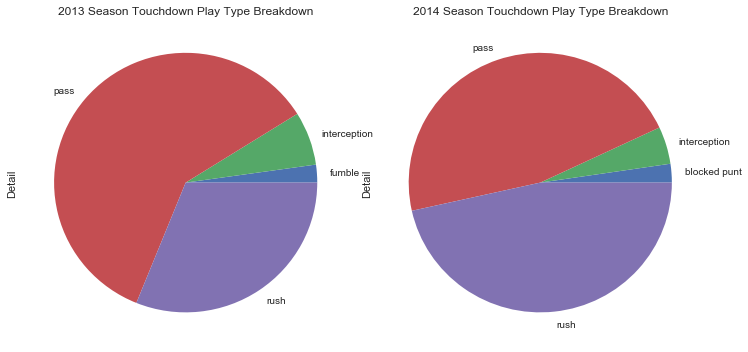

In [13]:
#dsp(td2013.head())
#dsp(td2014.head())
#td_op_2013

print(td2013['Type'].unique())
print(td2013.groupby('Type').count()['Detail'])

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
td2013.groupby('Type').count()['Detail'].plot(kind = 'pie', use_index = False, 
                                              title = '2013 Season Touchdown Play Type Breakdown')

plt.subplot(1,2,2)
td2014.groupby('Type').count()['Detail'].plot(kind = 'pie', use_index = False, 
                                              title = '2014 Season Touchdown Play Type Breakdown')

plt.tight_layout()
plt.show()

<p>As we can see here, most touchdowns in the 2013 season were accomplished from a passing play. Whereas the touchdowns accomplished in 2014 were more evenly distributed between pass and rush plays. The next thing to look at would be what kind of plays we expect to see result in a touchdown in the opponent's red zone (40-50 yds in our layout)</p>

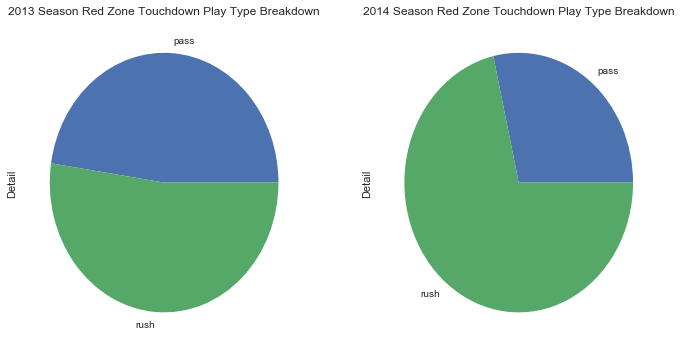

In [5]:
rztd2013 = td2013[td2013['Dist'] < 10]
rztd2014 = td2014[td2014['Dist'] < 10]

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
rztd2013.groupby('Type').count()['Detail'].plot(kind = 'pie', use_index = False, 
                                              title = '2013 Season Red Zone Touchdown Play Type Breakdown')

plt.subplot(1,2,2)
rztd2014.groupby('Type').count()['Detail'].plot(kind = 'pie', use_index = False, 
                                              title = '2014 Season Red Zone Touchdown Play Type Breakdown')

plt.tight_layout()
plt.show()

<p>As we can see, rush touchdowns outweigh pass touchdowns in the opponents red zone, but what is surprising is that there aren't an insignificant number of pass touchdowns. What we can establish here is that, in some circumstances, calling a passing play in the opponents red zone is reasonable. What about circumstances similar to the infamous last offensive call the Seattle Seahawks made in the 2015 supberbowl? </p>

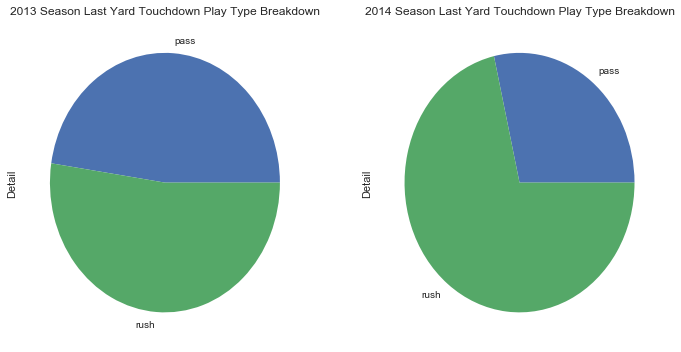

In [6]:
#Last Yard Touchdowns
lytd2013 = td2013[td2013['Dist'] < 2]
lytd2014 = td2014[td2014['Dist'] < 2]

plt.figure(figsize = (10,5)) #Why is this one different?
plt.subplot(1,2,1)
rztd2013.groupby('Type').count()['Detail'].plot(kind = 'pie', use_index = False, 
                                              title = '2013 Season Last Yard Touchdown Play Type Breakdown')

plt.subplot(1,2,2)
rztd2014.groupby('Type').count()['Detail'].plot(kind = 'pie', use_index = False, 
                                              title = '2014 Season Last Yard Touchdown Play Type Breakdown')

plt.tight_layout()
plt.show()

<p>Surprisingly, the demographic hasn't changed all that much, successful pass calls are still being made up to the last yard. Let us observe the histograms of touchdowns by their play type:</p>

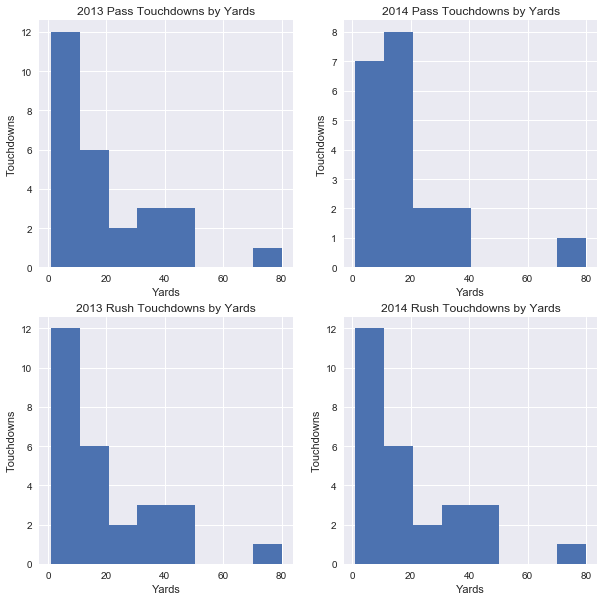

In [15]:
passtds2013 = td2013[td2013['Type'] == 'pass']
rushtds2013 = td2013[td2013['Type'] == 'pass']

passtds2014 = td2014[td2014['Type'] == 'pass']
rushtds2014 = td2014[td2014['Type'] == 'pass']

plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.hist(passtds2013['Dist'], bins = 8)
plt.xlabel('Yards')
plt.ylabel("Touchdowns")
plt.title('2013 Pass Touchdowns by Yards')

plt.subplot(2,2,2)
plt.hist(passtds2014['Dist'], bins = 8)
plt.xlabel('Yards')
plt.ylabel("Touchdowns")
plt.title('2014 Pass Touchdowns by Yards')

plt.subplot(2,2,3)
plt.hist(rushtds2013['Dist'], bins = 8)
plt.xlabel('Yards')
plt.ylabel("Touchdowns")
plt.title('2013 Rush Touchdowns by Yards')

plt.subplot(2,2,4)
plt.hist(rushtds2013['Dist'], bins = 8)
plt.xlabel('Yards')
plt.ylabel("Touchdowns")
plt.title('2014 Rush Touchdowns by Yards')

plt.show()

<p>As we can see, almost all touchdown plays occure within the opponent's territory, with the majority of these within the 20 yard line. What is interesting here is that the number of successful pass touchdowns from 0-10 yards outweighs the number of 10-20 yard pass touchdowns in 2013, whereas the inverse is true in 2014, but the difference is not as pronounced. Most rushing touchdowns occur in the 0-10 yard range in both 2013 and 2014 by a wide margin.</p>